#  Video Game Sales 电子游戏销售分析

##  1、电子游戏市场分析

### 首先导入需要的库和数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/liuhao/Desktop/数据挖掘/刘豪_3120191022/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 看一下数据的基本信息：

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### 可以看到，年份和发行商是含有缺失值的，在后续进行回归分析的之前，我们不要忘了对缺失值进行处理

## 近30年全球游戏销量变化趋势

Text(0.5, 1.0, 'Year wise global game sales :')

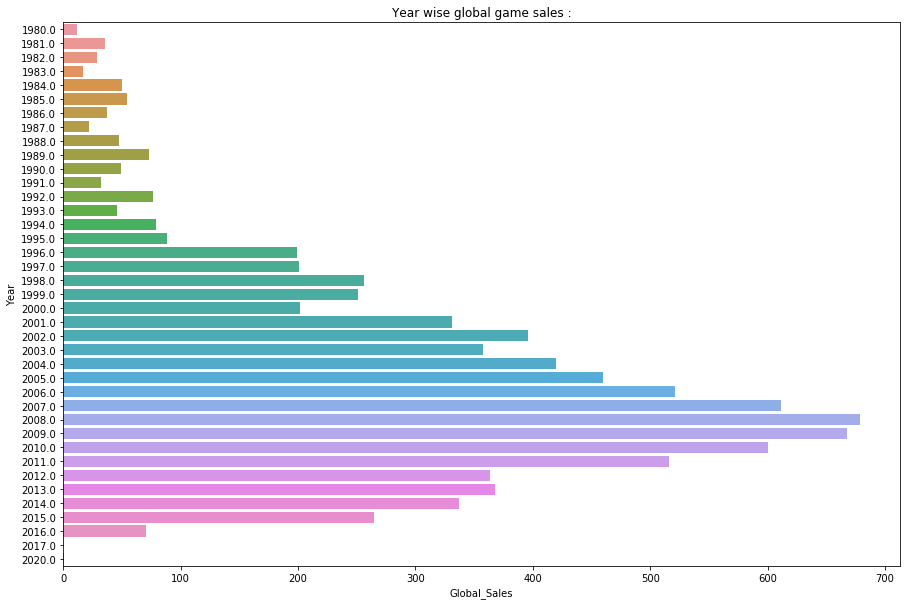

In [3]:
plt.rcParams['figure.figsize'] = (15,10)
year_wise_game_sales  = pd.pivot_table(df ,index = "Year" ,values = "Global_Sales",aggfunc = np.sum)
sns.barplot(year_wise_game_sales["Global_Sales"],year_wise_game_sales.index,orient = "h")
plt.title("Year wise global game sales :")

### 在进行详细分析前，我们先粗略看一下全球游戏销量变化。可以看到，截止到2008年，游戏销量基本呈现快速增加的趋势。从2008年之后，游戏销量有了一个断崖式的下跌。我想这可能和最近十年左右互联网的飞速发展有关，很多线下游戏机厂商面临着十分严峻的转型压力。

### (1)  最受欢迎的游戏

In [4]:
most_pop = df.Global_Sales.max()
print("最受欢迎的游戏是：{}，发行年份为{}，销量为；{}(百万)".format(df[df.Global_Sales == most_pop]["Name"].values[0],df[df.Global_Sales == most_pop]["Year"].values[0], most_pop)) 

最受欢迎的游戏是：Wii Sports，发行年份为2006.0，销量为；82.74(百万)


### 可见最受欢迎的游戏是2006年任天堂发行的运动游戏will sports，销量达到了8274万。

### (2)  最受欢迎的游戏类型

Text(0.5, 1.0, 'Top 10 Genre')

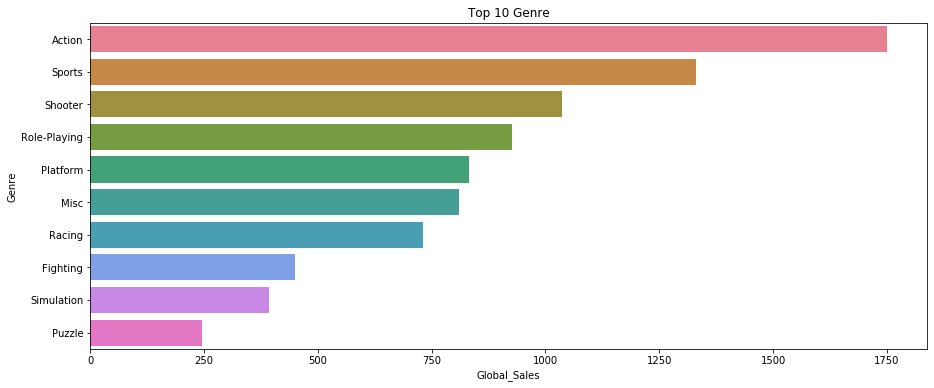

In [5]:
plt.rcParams['figure.figsize'] = (15,6)
genre_wise_game_sales  = pd.pivot_table(df ,index = "Genre" ,values = "Global_Sales",aggfunc = np.sum)
genre_wise_game_sales  = genre_wise_game_sales.sort_values(by = "Global_Sales",ascending  = False).head(10)
sns.barplot(genre_wise_game_sales["Global_Sales"],genre_wise_game_sales.index,orient = "h",palette = "husl")
plt.title("Top 10 Genre")

### 可见最受欢迎的游戏类型是动作类游戏，和我们的直观感觉相符。进一步的，我想看一下动作类游戏中那几个游戏销量最高，所以进行以下分析：

,Name,Global_Sales
16,Grand Theft Auto V,21.40
17,Grand Theft Auto: San Andreas,20.81
24,Grand Theft Auto: Vice City,16.15
38,Grand Theft Auto III,13.10
45,Pokemon HeartGold/Pokemon SoulSilver,11.90


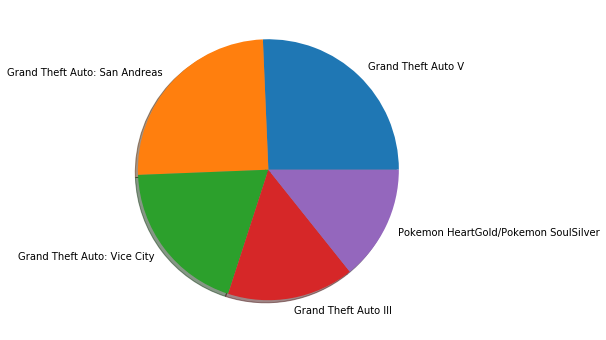

In [6]:
top_five_action_games = df[df.Genre == "Action"][["Name","Global_Sales"]]
top_five_action_games = top_five_action_games.sort_values(by = "Global_Sales",ascending = False )
top_five_action_games = top_five_action_games.drop_duplicates(["Name"]).head(5)
plt.pie(x = top_five_action_games["Global_Sales"],labels= list(top_five_action_games.Name),shadow=True)
top_five_action_games

### GTA系列的包揽了排行榜的前四名，可见其获得的巨大成功。

### (3)  最受欢迎的游戏发行平台

Text(0.5, 1.0, 'Top 10 Platform')

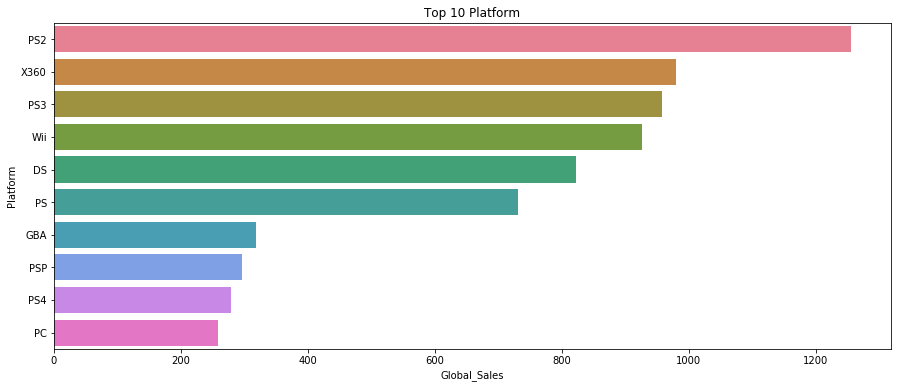

In [7]:
Platform_wise_game_sales  = pd.pivot_table(df ,index = "Platform" ,values = "Global_Sales",aggfunc = np.sum)
Platform_wise_game_sales  = Platform_wise_game_sales.sort_values(by = "Global_Sales",ascending  = False).head(10)
sns.barplot(Platform_wise_game_sales["Global_Sales"],Platform_wise_game_sales.index,orient = "h",palette = "husl")
plt.title("Top 10 Platform")

### 可见最受欢迎的游戏发行平台是PS2，X360、PS3和Wii三者差距不大。

### (4)  最受欢迎的游戏发行商

Text(0.5, 1.0, 'Top 10 Publisher')

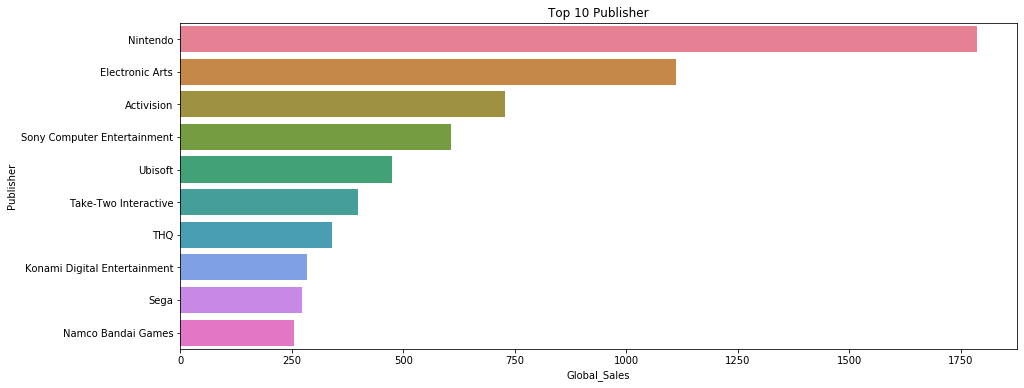

In [8]:
Publisher_wise_game_sales  = pd.pivot_table(df ,index = "Publisher" ,values = "Global_Sales",aggfunc = np.sum)
Publisher_wise_game_sales  = Publisher_wise_game_sales.sort_values(by = "Global_Sales",ascending  = False).head(10)
sns.barplot(Publisher_wise_game_sales["Global_Sales"],Publisher_wise_game_sales.index,orient = "h",palette = "husl")
plt.title("Top 10 Publisher")

### 可见最受欢迎的游戏发行商是任天堂，遥遥领先于第二名EA公司

## 2、预测每年电子游戏销售额

### 经过上文分析我们已经知道这个表格中存在缺失值。在进行预测前，需要进行数据清理工作。首先统计各个属性的缺失值个数：

In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### 可见年份和发行商两者存在缺失值。我们使用众数进行缺失值的填补。

In [10]:
data = df.copy()

data['Year'].fillna(data['Year'].mode()[0], inplace=True)

data['Publisher'].replace(np.nan, data['Publisher'].mode()[0], inplace=True)

data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### 填补过后，缺失值个数为0，为我们后续的预测工作做好了准备。

### 首先导入一些需要的函数库，我们使用三种方式对销售值进行预测，分别是线性回归、随机森林回归和岭回归。

### 在进行回归分析之前，需要对数据集进行处理。首先挑选用于预测全球销售额的变量，在这些属性之中，各个地区的单独销售额不能用来预测全球销售额，因为前几者求和可直接得到全球销售额。所以最终我们选择发行平台、游戏类型和发行商作为预测全球销售额的变量。因为含有标称属性，所以把其映射为一组数字，以方便预测。
### 选取所有数据的70%为训练数据集、30%为测试数据集，以验证预测的效果。通过对结果计算R2决定系数、调整的R2决定系数和均方误差来判断预测的好坏。R2系数越接近于1，结果越好；MSE越小，结果越好

In [11]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

data.drop(["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Rank","Name","Year"],axis = 1,inplace = True)
x_data = data.drop("Global_Sales",axis = 1)
y_data = data["Global_Sales"]

for i in x_data.columns:
    x_data[i]=x_data[i].factorize()[0]

xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=.3,random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)
x_data

(11618, 3) (4980, 3) (11618,) (4980,)


,Platform,Genre,Publisher
0,0,0,0
1,1,1,0
2,0,2,0
3,0,0,0
4,2,3,0
...,...,...,...
16593,8,1,187
16594,18,6,51
16595,6,2,4
16596,3,4,507


### (1) 线性回归

In [12]:
lr_model =LinearRegression()
lr_model.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest,ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score         : ",r2_score(ytest,ypred))
print("adjusted_r2_score: ",adjusted_r2_score)                         
print("MSE              : ",mean_squared_error(ytest,ypred))

r2_score         :  0.02995233473795189
adjusted_r2_score:  0.029367498926901603
MSE              :  1.8899972130275347


### (2) 随机森林回归

In [13]:
rf_model = RandomForestRegressor(n_estimators=200,min_samples_split=20)
rf_model.fit(xtrain,ytrain)
ypred = rf_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest,ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score         : ",r2_score(ytest,ypred))
print("adjusted_r2_score: ",adjusted_r2_score)
print("MSE              : ",mean_squared_error(ytest,ypred))

r2_score         :  0.11754562409457103
adjusted_r2_score:  0.11701359774253794
MSE              :  1.7193343902690232


### (3) 岭回归

In [14]:
r_model = Ridge(alpha=1)
r_model.fit(xtrain,ytrain)
ypred = r_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest,ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score         : ",r2_score(ytest,ypred))
print("adjusted_r2_score: ",adjusted_r2_score)
print("MSE              : ",mean_squared_error(ytest,ypred))

r2_score         :  0.029952351137828348
adjusted_r2_score:  0.029367515336665484
MSE              :  1.8899971810747533


### 可见，在这三种预测方式中，用随机森林的方式对全球销售额进行预测效果更好一些，均方误差更小，R2系数更接近于1一点。这个结果证明了采用ensemble的效果相比单模型的会更好。

## 3、可视化应用：展示销售故事

### 我们需要在上述分析的基础上，对结果进行更深一步的探索，用以发现何种游戏更受大家欢迎，这样可以方便公司制定发展战略。首先我们根据游戏类型比较不同地区喜欢的游戏。

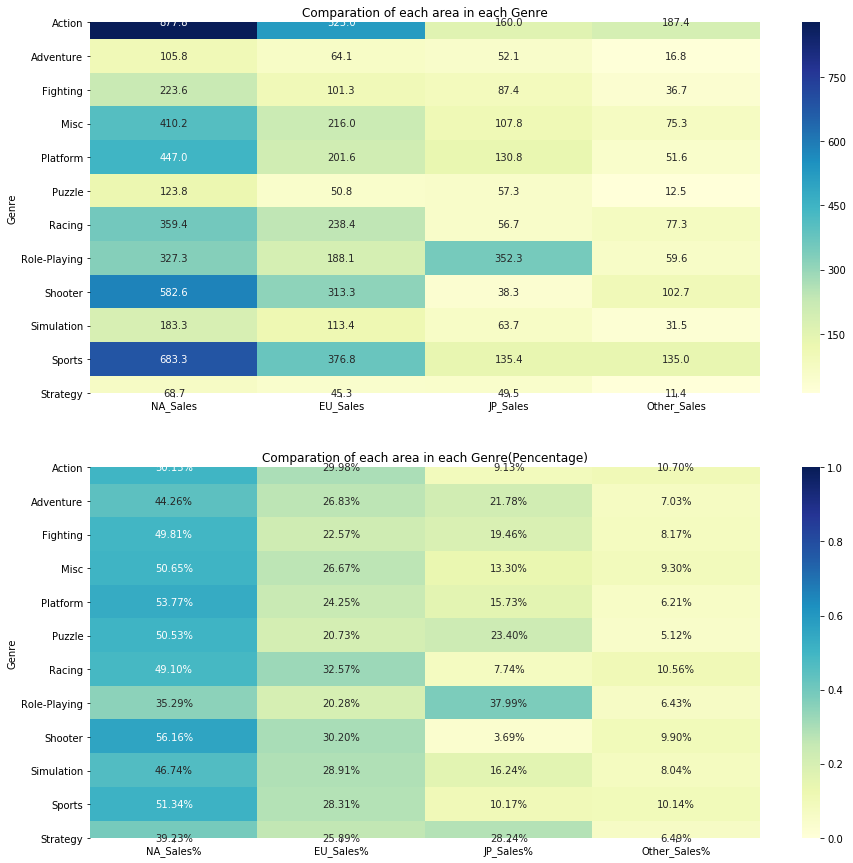

In [15]:
GenreGroup = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
plt.figure(figsize=(15, 15))
plt.subplot(211)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f',cmap="YlGnBu")
plt.title("Comparation of each area in each Genre")
plt.subplot(212)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%',cmap="YlGnBu")
plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()

### 分析：
### (1) 从图中可以看出，总体来说，北美的销量远多于其他地区，也就是说一款游戏能抓住北美地区玩家的喜好就可以获得一个不少的销售额了。
### (2) 在北美地区和欧洲地区中，动作类游戏最受欢迎，其次是运动类和射击类。如果打造一款动作类游戏，有较大的概率会在这两个地区受到欢迎。考虑到北美地区玩家数量众多，为了公司的未来发展，建议主力研发动作类游戏。
### (3) 在日本地区，角色扮演类的游戏最受欢迎，如果一家游戏公司打算在日本发展，最好考虑研发角色扮演类游戏。

### 之后，我们看一下大的游戏发行商的全球销量随时间的变化规律，这有助于我们找到适合时代发展的游戏发行模式。

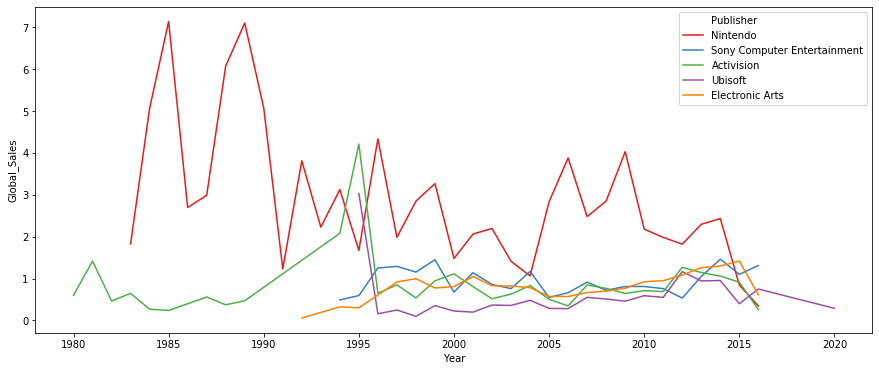

In [16]:
top_publishers_list = df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(5).index

top_publishers_df = df[df.Publisher.isin(top_publishers_list)]

sns.lineplot(x='Year', y='Global_Sales',data=top_publishers_df, hue='Publisher',ci=None,palette='Set1')

plt.show()

### 这是全球前五大游戏发行商的全球销售额随时间的变化情况。可以看到1995年前，游戏公司基本上呈现一家独大的情况。进入到二十一世纪，开始了百花齐放的年代，不过任天堂的销量还是遥遥领先。2015年似乎是一大转折点，这一年所有游戏公司的销量均大幅度下跌。这或许暗示了游戏公司不能再走传统模式，需要发掘新的游戏模式了。

### 经过上述分析，我们可以看出，如今想要经营好一家游戏公司，首先必须找到自己的目标客户，根据不同的目标客户选择不同的游戏类型进行研发，可以做到事半功倍的效果。但是最近几年，可能由于互联网行业的迅速发展，游戏行业不同以往，如果仍坚持老路可能无法长远，必须要探索一条新的发展道路。 